**Oliver Barnes 21/10/2022 1905121**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Task 2.1

The Fisher iris dataset contains sepal and petal length and width in 150 iris flowers, each falling into one of three categories.

The labels provided show which category each iris belongs to.

(150, 4)
(150,)


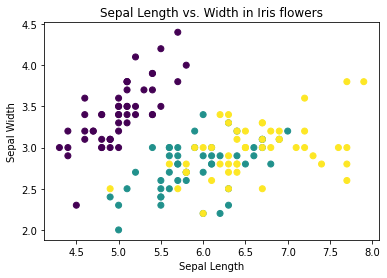

In [3]:
data = np.load("Iris_data.npy")
labels = np.load("Iris_labels.npy")

print(data.shape)
#print(labels)
print(labels.shape)

x = data[:, 0] #sepal length
y = data[:, 1] #sepal width
c = labels[:] #label

plt.title("Sepal Length vs. Width in Iris flowers")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(x,y,c=c)


# Task 2.2

KMeans object is created with:

```
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
```

This also states that the K value should be 3 (3 clusters) and seeds the RNG with the value of 0 for a consistent result.
It is fed the complete iris data with all 4 dimensions.

The scatter plot is then created, using the labels predicted by KMeans, as you can see from:

```
c = kmeans.labels_ #predicted labels
```

The data for the centroids is from:

```
kmeans.cluster_centers_
```

And the correct feature dimensions are selected from this data in the same way we get them through the iris dataset, shown here:

```
centroidsX = kmeans.cluster_centers_[:, 0]
centroidsY = kmeans.cluster_centers_[:, 1]
```

Finally these centroids are marked onto our plot.

```
plt.scatter(centroidsX, centroidsY, c="Red", marker="X")
```

The resulting predicted labels are not 100% accurate to the true labels, with the most notable inaccuracies in the center, where the purple and yellow groups meet. 13 points are wrongly labelled by my count.

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


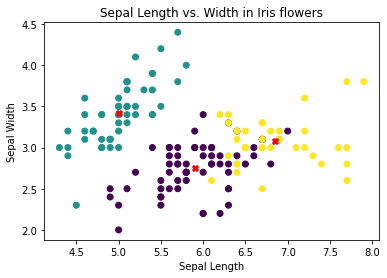

In [ ]:
data = np.load("Iris_data.npy")
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

#print(kmeans.labels_)

x = data[:, 0] #sepal length
y = data[:, 1] #sepal width
c = kmeans.labels_ #predicted labels

centroidsX = kmeans.cluster_centers_[:, 0]
centroidsY = kmeans.cluster_centers_[:, 1]

plt.title("Sepal Length vs. Width in Iris flowers")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(x,y,c=c)

plt.scatter(centroidsX, centroidsY, c="Red", marker="X")

# Task 2.3

5 points are wrongly labelled by my count. It is more accurate than the K-Means prediction.

Init_params specifies how the weights are initialised, the default is to use k-means, but it can be set to random.

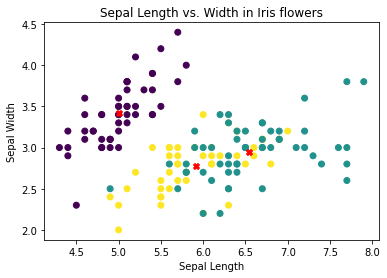

In [ ]:
data = np.load("Iris_data.npy")
gmm = GaussianMixture(n_components=3, random_state=0).fit(data)

means = gmm.means_ #gaussian means
labels = gmm.predict(data) #data labels

meansX = means[:, 0]
meansY = means[:, 1]

x = data[:, 0] #sepal length
y = data[:, 1] #sepal width
c = labels #predicted labels

plt.title("Sepal Length vs. Width in Iris flowers")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(x,y,c=c)

plt.scatter(meansX, meansY, c="Red", marker="X")

# Posterior probability data

.predict_proba() returns an array of shape (150, 3) where each element of the sub-array is the probability that the sample belongs to a given group.

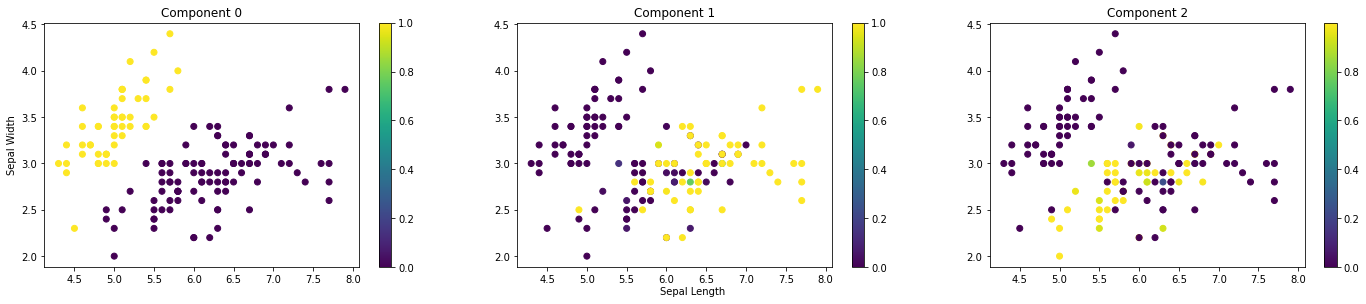

In [ ]:
prob = gmm.predict_proba(data)
# print(prob)

prob1 = prob[:, 0]
prob2 = prob[:, 1]
prob3 = prob[:, 2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plot1 = ax1.scatter(x,y,c=prob1)
plot2 = ax2.scatter(x,y,c=prob2)
plot3 = ax3.scatter(x,y,c=prob3)

plt.colorbar(plot1, ax=ax1)
plt.colorbar(plot2, ax=ax2)
plt.colorbar(plot3, ax=ax3)

ax1.set_title("Component 0")
ax2.set_title("Component 1")
ax3.set_title("Component 2")

ax1.set_ylabel("Sepal Width")
plt.gcf().text(0.5,0.04,"Sepal Length", ha="center")
plt.gcf().set_size_inches(24, 4.5)


# Task 2.4

Would be impractical to look at all possible comparisons within the data, it has 10 feature dimensions and therefore there would be 45 comparisons to make.

I thought a good approach might be to only compare each feature dimension to it's neighbors, as to minimize the number of comparisons.

The only hint given is that the true number of clusters is not 2, so a good value to start with would be 3.

3 clusters looked fine for the first two comparisons, but looked odd in the third one.


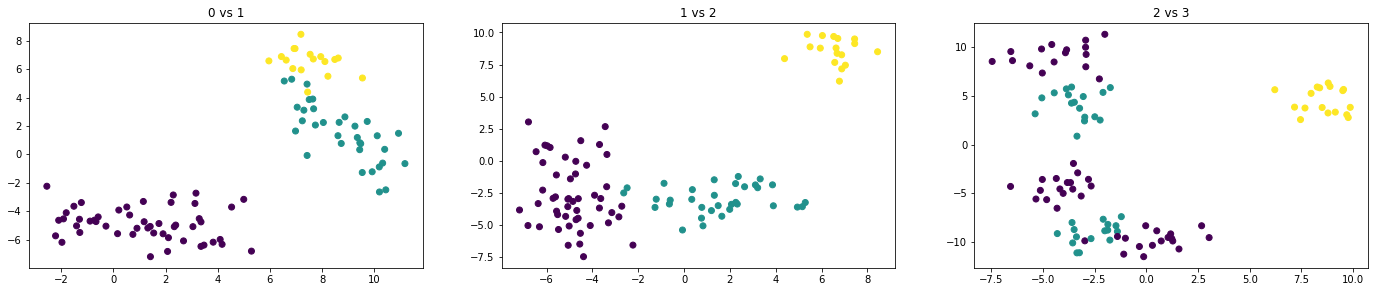

In [6]:
data = np.load("task2_4.npy")
# print(data.shape)

gmm = GaussianMixture(n_components=3, random_state=0).fit(data)

# means = gmm.means_ #gaussian means
labels = gmm.predict(data) #data labels

#x = data[:, 0] 
#y = data[:, 1] 

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plot1 = ax1.scatter(data[:, 0],data[:, 1],c=labels)
plot2 = ax2.scatter(data[:, 1],data[:, 2],c=labels)
plot3 = ax3.scatter(data[:, 2],data[:, 3],c=labels)

ax1.set_title("0 vs 1")
ax2.set_title("1 vs 2")
ax3.set_title("2 vs 3")

plt.gcf().set_size_inches(24, 4.5)

It looked like 6 clusters would fit that data better, so I changed n.

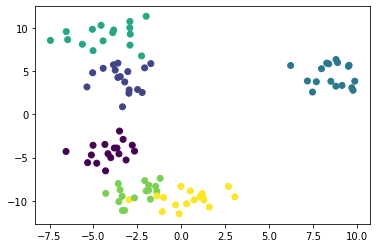

In [7]:
gmm = GaussianMixture(n_components=6, random_state=0).fit(data)
labels = gmm.predict(data) #data labels

x = data[:, 2]
y = data[:, 3]
c = labels

plt.scatter(x,y,c=c)

It did in fact fit the data better, and this became more obvious with the next comparison.

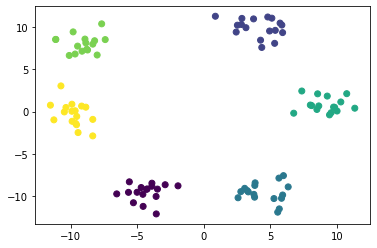

In [8]:
x = data[:, 3]
y = data[:, 4]
c = labels

plt.scatter(x,y,c=c)

6 clear, seperate groups are shown here.

n=6 didn't always fit the remainder of the comparisons, sometimes they could look crowded and difficult to understand. Other times it could look like there were only 5 groups.

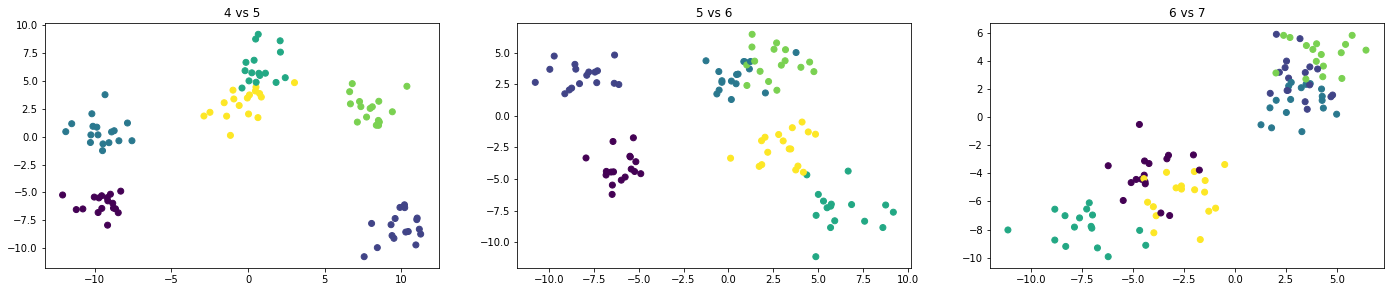

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plot1 = ax1.scatter(data[:, 4],data[:, 5],c=labels)
plot2 = ax2.scatter(data[:, 5],data[:, 6],c=labels)
plot3 = ax3.scatter(data[:, 6],data[:, 7],c=labels)

ax1.set_title("4 vs 5")
ax2.set_title("5 vs 6")
ax3.set_title("6 vs 7")

plt.gcf().set_size_inches(24, 4.5)

As shown here, 4vs5 and 5vs6 look quite promising, but 6vs7 doesn't look quite right given the sheer amount of overlap in the top corner.

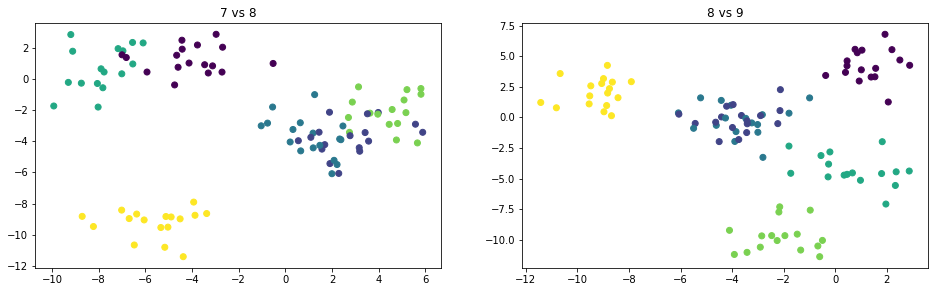

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2)
plot1 = ax1.scatter(data[:, 7],data[:, 8],c=labels)
plot2 = ax2.scatter(data[:, 8],data[:, 9],c=labels)

ax1.set_title("7 vs 8")
ax2.set_title("8 vs 9")

plt.gcf().set_size_inches(16, 4.5)

With both of these it's quite hard to say if the number of clusters is correct, both of them look like they might suit 5 clusters better.

I also ran the initial 2 comparisons again, although they looked as noisy and confusing as these in places. 0vs1 seems mostly ok though.

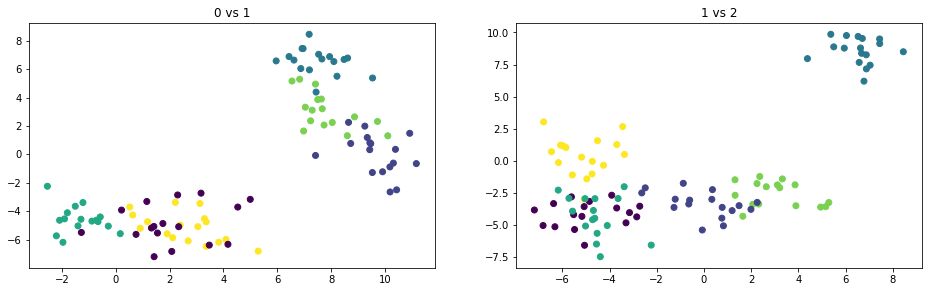

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
plot1 = ax1.scatter(data[:, 0],data[:, 1],c=labels)
plot2 = ax2.scatter(data[:, 1],data[:, 2],c=labels)

ax1.set_title("0 vs 1")
ax2.set_title("1 vs 2")

plt.gcf().set_size_inches(16, 4.5)

After some research I read about silhouette analysis, and the elbow method for picking a number of groups, but I wasn't sure if we were supposed to implement these or not.

I think there are 6 groups. It looks correct in 50% of the comparisons I did. Just to see if I could get any confirmation on this I decided to graph the posterior probability.

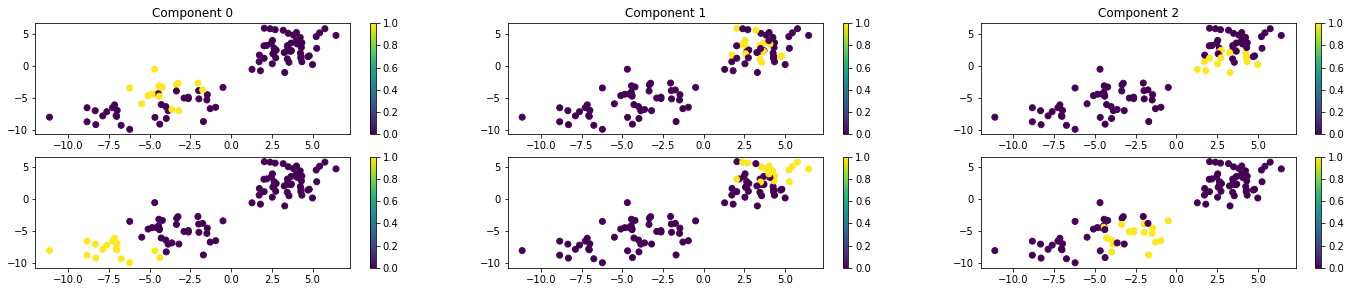

In [14]:
prob = gmm.predict_proba(data)
# print(prob)

x = data[:, 6]
y = data[:, 7]

fig, axs = plt.subplots(2,3)
plot1 = axs[0, 0].scatter(x,y,c=prob[:, 0])
plot2 = axs[0, 1].scatter(x,y,c=prob[:, 1])
plot3 = axs[0, 2].scatter(x,y,c=prob[:, 2])
plot1 = axs[1, 0].scatter(x,y,c=prob[:, 3])
plot2 = axs[1, 1].scatter(x,y,c=prob[:, 4])
plot3 = axs[1, 2].scatter(x,y,c=prob[:, 5])

plt.colorbar(plot1, ax=axs[0, 0])
plt.colorbar(plot2, ax=axs[0, 1])
plt.colorbar(plot3, ax=axs[0, 2])
plt.colorbar(plot1, ax=axs[1, 0])
plt.colorbar(plot2, ax=axs[1, 1])
plt.colorbar(plot3, ax=axs[1, 2])

axs[0, 0].set_title("Component 0")
axs[0, 1].set_title("Component 1")
axs[0, 2].set_title("Component 2")
axs[0, 0].set_title("Component 0")
axs[0, 1].set_title("Component 1")
axs[0, 2].set_title("Component 2")

plt.gcf().set_size_inches(24, 4.5)

It's fairly certain that each of these points are in the correct groups, there's very little doubt shown by this.

In conclusion, I think there's 6 groups.

# Please ignore, just used for testing


[[4.5 2.  0.  0. ]
 [6.2 2.2 4.5 1.5]
 [5.9 3.2 4.8 1.8]
 [6.3 2.5 4.9 1.5]
 [6.7 3.  5.  1.7]
 [6.  2.7 5.1 1.6]]


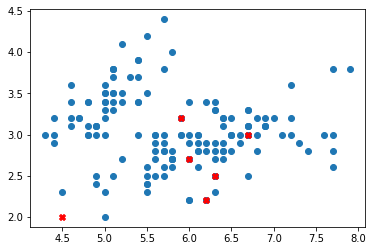

In [ ]:
# Test Cell to compare results

gmdata1 = [ 68,  70,  72,  77,  83, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149]

gmdata2 = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 69, 71, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

truedata1 = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

truedata2 = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]

overlap = np.array([[4.5,2,0,0]])

for i in truedata1:
  if i in gmdata1:
    #print(i)
    #print(data[i])
    overlap = np.vstack([overlap, data[i]])

#for i in gmdata2:
#  if i in truedata2:
#    print(i)
#    print(data[i])
#    overlap = np.vstack([overlap, data[i]])

x = data[:, 0] #sepal length
y = data[:, 1] #sepal width

print(overlap)

markX = overlap[:, 0]
markY = overlap[:, 1]

plt.scatter(x,y)
plt.scatter(markX, markY, c="Red", marker="X")